
# 📊 SOLAQUA - Enhanced Synchronized Sonar & Net Distance Analysis
---

In [1]:
# 🔧 SETUP AND IMPORTS
# ===================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import importlib
import warnings

# Import SOLAQUA utilities
import utils.net_distance_analysis as sda
import utils.sonar_utils as sonar_utils

# Force reload utilities to get latest changes
importlib.reload(sda)
importlib.reload(sonar_utils)

# Configuration
warnings.filterwarnings('ignore', category=FutureWarning)
plt.rcParams['figure.figsize'] = (16, 12)

print("✅ All libraries imported and utilities loaded!")
print("🚀 Ready for streamlined sonar distance analysis!")

✅ All libraries imported and utilities loaded!
🚀 Ready for streamlined sonar distance analysis!


## 🎛️ Configuration

**Change these parameters to switch bags and frames:**

In [16]:
# 🎯 ANALYSIS CONFIGURATION
# =========================
# **CHANGE THESE PARAMETERS TO SWITCH ANALYSIS TARGET**

TARGET_BAG = "2024-08-22_14-06-43"  # 🔄 Change this to switch bags
FRAME_INDEX = 500                     # 🔄 Change this to switch frames
EXPORTS_FOLDER = "/Users/eirikvarnes/code/SOLAQUA/exports"

print(f"🎯 Analysis Configuration:")
print(f"   📁 Target Bag: {TARGET_BAG}")
print(f"   🖼️  Frame Index: {FRAME_INDEX}")
print(f"   📂 Exports Folder: {EXPORTS_FOLDER}")

🎯 Analysis Configuration:
   📁 Target Bag: 2024-08-22_14-06-43
   🖼️  Frame Index: 500
   📂 Exports Folder: /Users/eirikvarnes/code/SOLAQUA/exports


## 📡 Data Loading

Load all distance measurement data for the configured bag:

In [17]:
# 📡 LOAD ALL DISTANCE DATA FOR TARGET BAG
# ========================================

print(f"📡 Loading all distance data for bag: {TARGET_BAG}")
print("=" * 60)

# Load all data using utility function
raw_data, distance_measurements = sda.load_all_distance_data_for_bag(TARGET_BAG, EXPORTS_FOLDER)

# Extract individual datasets for easy access
nav_data = raw_data['navigation']
guidance_data = raw_data['guidance']

print(f"\n✅ Data loading complete!")
print(f"   📊 Navigation records: {len(nav_data) if nav_data is not None else 0}")
print(f"   📊 Guidance records: {len(guidance_data) if guidance_data is not None else 0}")
print(f"   📊 Distance sensors: {len(distance_measurements)}")

if distance_measurements:
    print(f"\n📏 Available distance measurements:")
    for name, info in distance_measurements.items():
        print(f"   • {name}: {info['description']}")

📡 Loading all distance data for bag: 2024-08-22_14-06-43
🎯 LOADING ALL DISTANCE DATA FOR BAG: 2024-08-22_14-06-43
📡 1. Loading Navigation Data...
   ✅ Loaded 322 navigation records
📡 2. Loading Guidance Data...
   ✅ Loaded 317 guidance records with ['error_net_distance', 'desired_net_distance', 'r_net_distance_d']
📡 3. Loading DVL Altimeter...
   ✅ Loaded 17 DVL altimeter records
📡 4. Loading USBL...
   ✅ Loaded 17 USBL records
📡 5. Loading DVL Position...
   ✅ Loaded 154 DVL position records
📡 6. Loading Navigation Position...
   ✅ Loaded 156 navigation position records
📡 7. Loading INS Z Position...
   ✅ Loaded 366 INS records with positionFrame.z

📊 LOADING SUMMARY:
   🎯 Target bag: 2024-08-22_14-06-43
   📁 Raw data loaded: 2/2
   📏 Distance measurements: 6

✅ Data loading complete!
   📊 Navigation records: 322
   📊 Guidance records: 317
   📊 Distance sensors: 6

📏 Available distance measurements:
   • DVL_Altimeter: Distance to seafloor
   • USBL_3D: 3D acoustic position
   • USBL_

## 🔬 Raw Data Extraction

Extract raw sonar data with run-specific parameters:

In [18]:
# 🎯 INTERACTIVE SONAR WITH ROTATED NET LINE (USING PITCH)
# ========================================================

import matplotlib.patches as patches

# Extract raw sonar data with configurable rmax
raw_matrix, processed_cone, extent, sonar_params = sda.extract_raw_sonar_data_with_configurable_rmax(
    TARGET_BAG, 
    FRAME_INDEX,
    rmax=20, 
    exports_folder=EXPORTS_FOLDER
)


🔬 EXTRACTING RAW SONAR DATA WITH CONFIGURABLE RMAX
   📁 Bag: 2024-08-22_14-06-43
   🖼️  Frame: 500
   📏 rmax: 20
📊 SONAR PARAMETERS:
   🏷️  Run Type: multi_dvl_early
   📏 Range Max: 20.0m (manual)
   📝 Description: NFH, 2m depth, 0.5-1.0m distance, 0.2 m/s speed
📡 Loading sonar data from: sensor_sonoptix_echo_image__2024-08-22_14-06-43_video.csv
   ✅ Loaded 592 sonar frames
🔍 Extracting raw sonar frame 500...
   ✅ Raw matrix shape: (1024, 256)
   📊 Value range: 0.000 to 67.000
⚙️  Processing with rmax=20.0m...
   ✅ Processed cone shape: (700, 900)
   📐 Extent: (np.float64(-4.330127018922193), np.float64(4.330127018922193), 0.0, 5.0)
   🕐 Timestamp: 12:07:18


/Users/eirikvarnes/code/SOLAQUA/utils/net_distance_analysis.py:625: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eirikvarnes/code/SOLAQUA/utils/net_distance_analysis.py:625: UserWarning: Glyph 129349 (\N{GOAL NET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eirikvarnes/code/SOLAQUA/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eirikvarnes/code/SOLAQUA/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129349 (\N{GOAL NET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


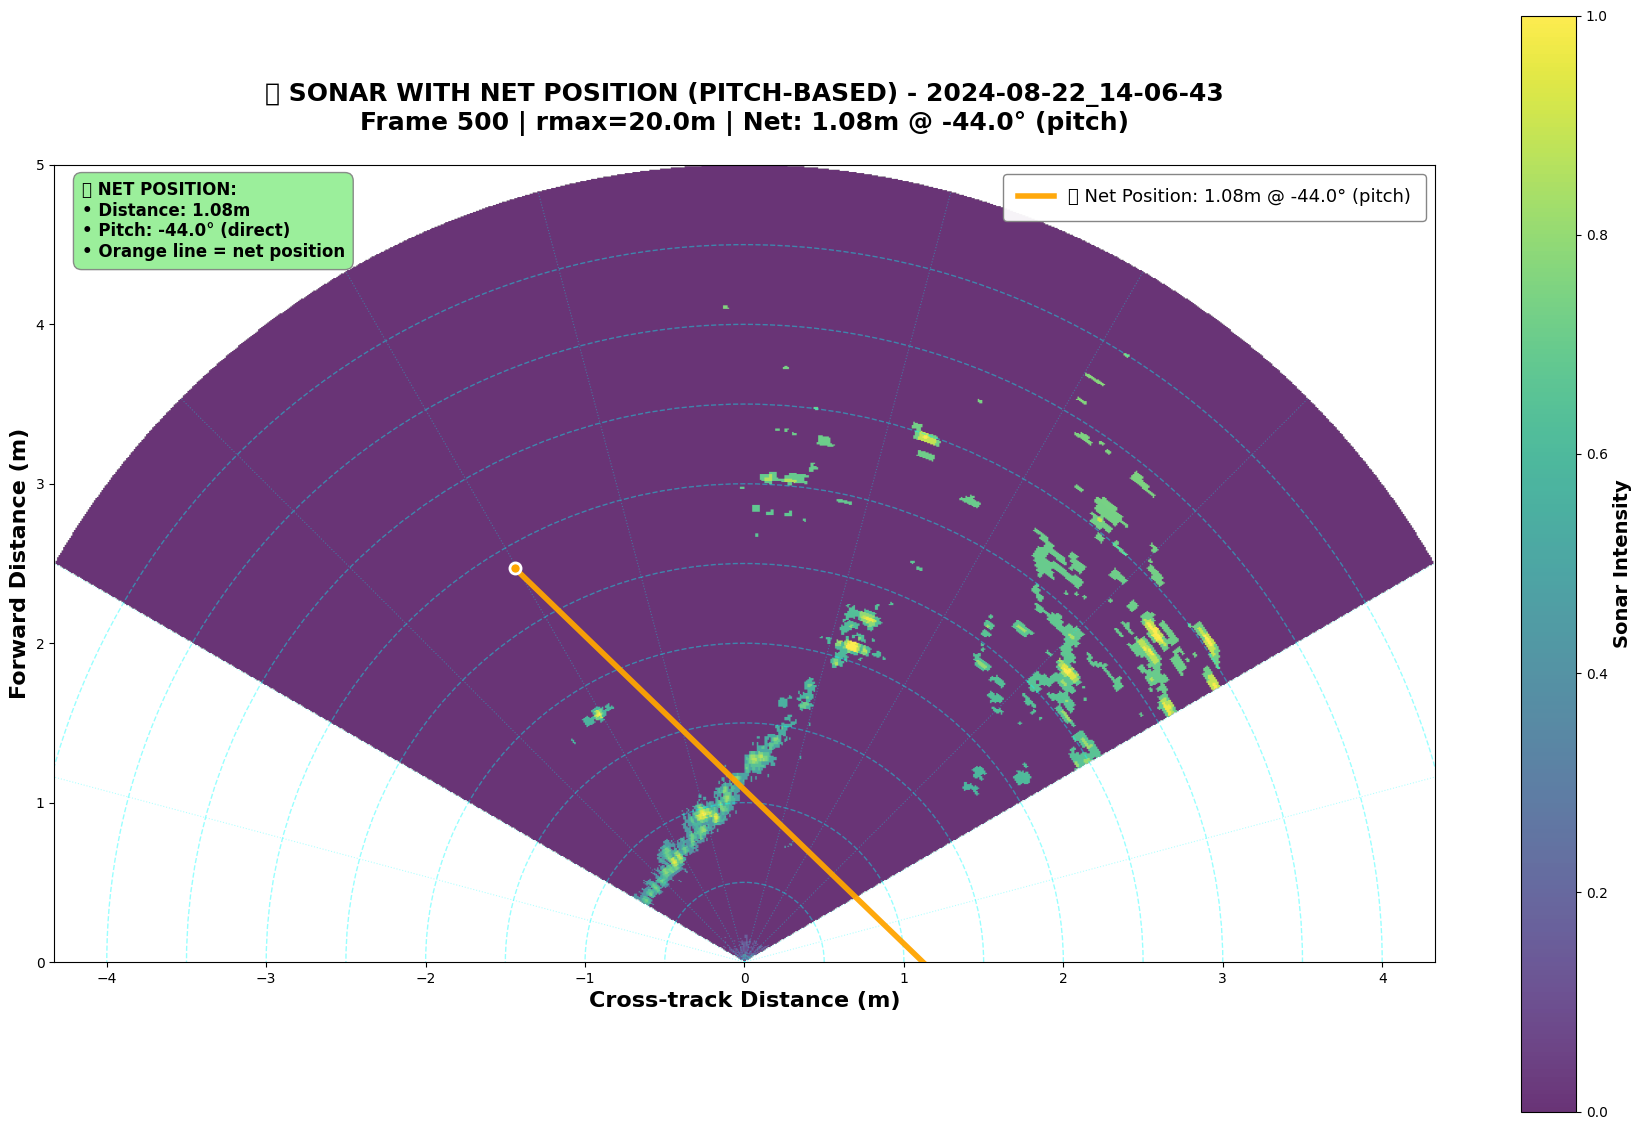

In [19]:
# Process sonar data and create enhanced visualization
from utils.net_distance_analysis import process_sonar_data_and_visualize

process_sonar_data_and_visualize(
    processed_cone=processed_cone,
    extent=extent,
    sonar_params=sonar_params,
    target_bag=TARGET_BAG,
    frame_index=FRAME_INDEX,
    exports_folder=EXPORTS_FOLDER,
    nav_data=nav_data,
    guidance_data=guidance_data,
    distance_measurements=distance_measurements
)

## 📋 SOLAQUA Dataset Overview

### 🌊 Available Experimental Datasets

| Bag ID | Date | Type | D0 | D1 | Z | V | rmax | Comment |
|--------|------|------|----|----|---|---|------|---------|
| `2024-08-20_13-39-34` | 2024-08-20 | Calibration | 1.5 | 1.5 | 2 | 0.2 | 20m | Stereo camera calibration |
| `2024-08-20_13-40-35` | 2024-08-20 | Calibration | 1.5 | 1.5 | 2 | 0.2 | 20m | Stereo camera calibration |
| `2024-08-22_14-06-43` | 2024-08-22 | Multi-DVL NFH | 0.5-1.0 | - | 2 | 0.2 | 20m | Early multi-DVL experiment |
| `2024-08-22_14-29-05` | 2024-08-22 | Multi-DVL NFH | 0.6-0.8 | - | 2 | 0.1 | 20m | Optimized multi-DVL |
| `2024-08-22_14-47-39` | 2024-08-22 | Multi-DVL NFH | 0.6 | 0.6 | 2 | 0.1 | 20m | Constant distance experiment |

### 📊 Parameter Definitions:
- **D0/D1**: Initial/Final desired distance to net [m]
- **Z**: Depth [m] 
- **V**: Net-relative velocity [m/s]
- **rmax**: Sonar maximum range [m]
- **NFH**: Net Following Horizontal
- **Multi-DVL**: Experiments using Waterlinked A50 + Nortek Nucleus 1000 DVLs

### 🎯 Available Sensor Data:
IMU, Gyroscope, DVL, USBL, Multibeam sonar, Ping 360 sonar, Mono/Stereo cameras, Depth/Pressure/Temperature sensors

---